#### Carregando dataframe

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("results/resultados_combinados.csv")
df

,type,N,W,w_avg,w_max,v_avg,v_max,BB_sol,BB_time,BB_mem,FPTAS_sol,FPTAS_time,FPTAS_mem,greedy_sol,greedy_time,greedy_mem
0,Large,200,997,498.0900,997.0000,711.5900,1230.0000,5397.000,1556,1904,5397.000,300534.0,77812,5397.000,40,1920
1,Large,500,2543,513.8640,997.0000,494.1420,998.0000,28857.000,338508,1912,28857.000,547385.0,988776,28834.000,113,1904
2,Large,500,2543,513.8640,997.0000,516.6340,1074.0000,4566.000,47974,1912,4566.000,1447580.0,960140,4552.000,114,1912
3,Large,500,2517,508.6120,998.0000,608.6120,1098.0000,7117.000,264675,1916,7117.000,593078.0,1104824,7098.000,83,1912
4,Low,20,879,54.9000,96.0000,54.3000,91.0000,1025.000,1997,1904,1025.000,624.0,3760,1019.000,7,1904
5,Low,10,269,53.9000,95.0000,41.2000,87.0000,295.000,27,1864,293.000,74.0,1920,294.000,6,1920
6,Low,20,878,54.9000,96.0000,54.2500,91.0000,1024.000,2792,1900,1024.000,327.0,3816,1018.000,11,1916
7,Low,4,20,6.7500,9.0000,12.0000,15.0000,35.000,12,1916,35.000,23.0,1976,35.000,7,1924
8,Low,4,11,4.7500,7.0000,10.2500,13.0000,23.000,14,1924,23.000,32.0,1924,16.000,9,1864
9,Low,15,375,49.4611,89.5962,37.5331,98.8525,481.069,60,1924,481.069,196.0,1924,481.069,11,1864


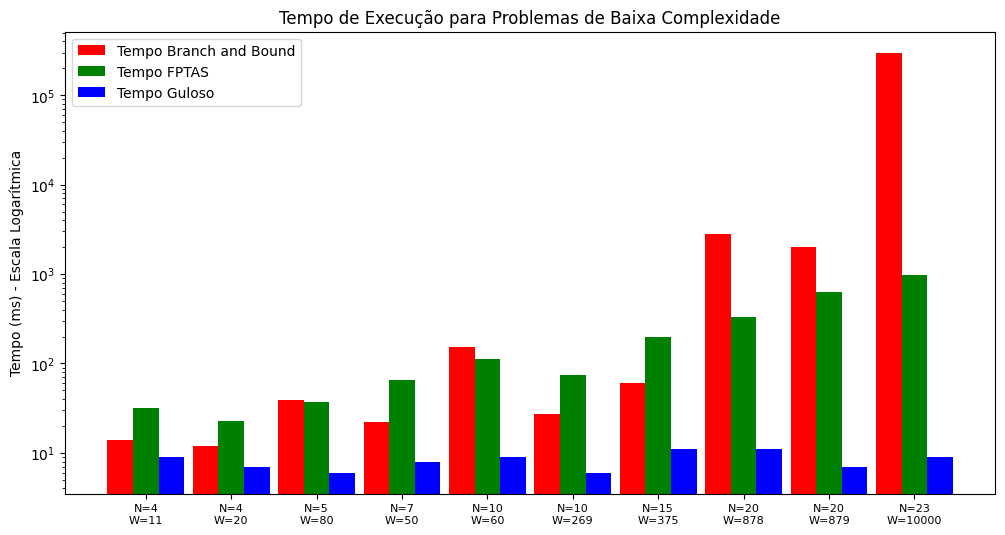

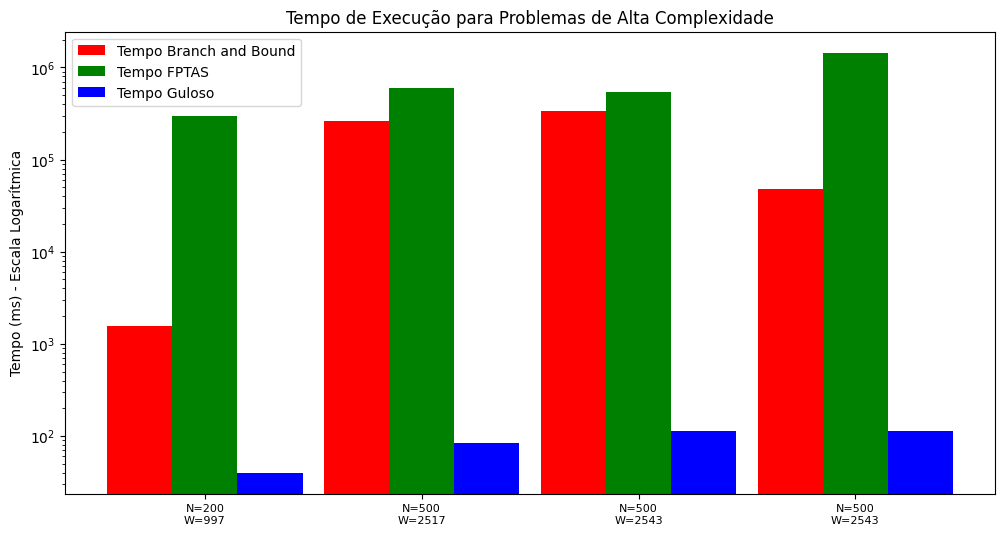

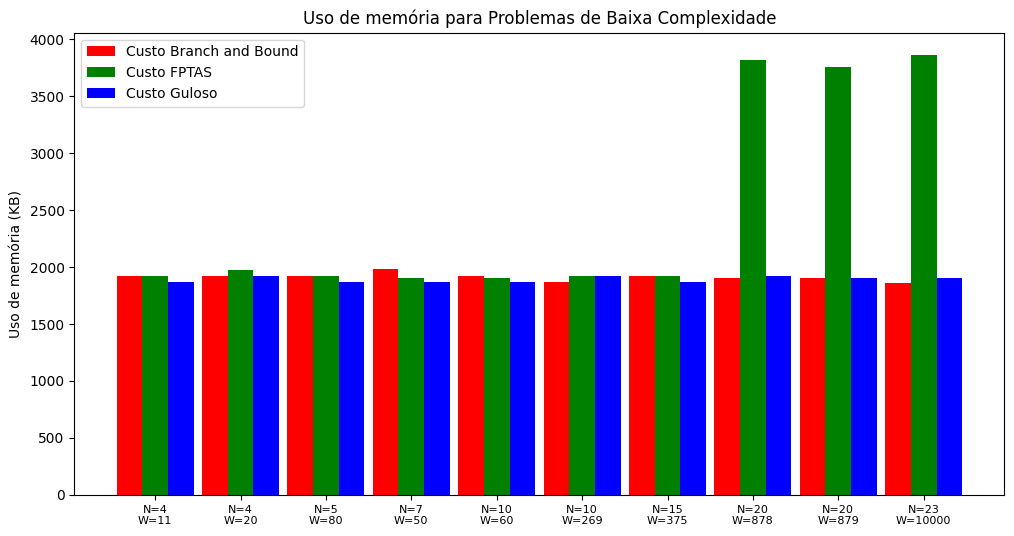

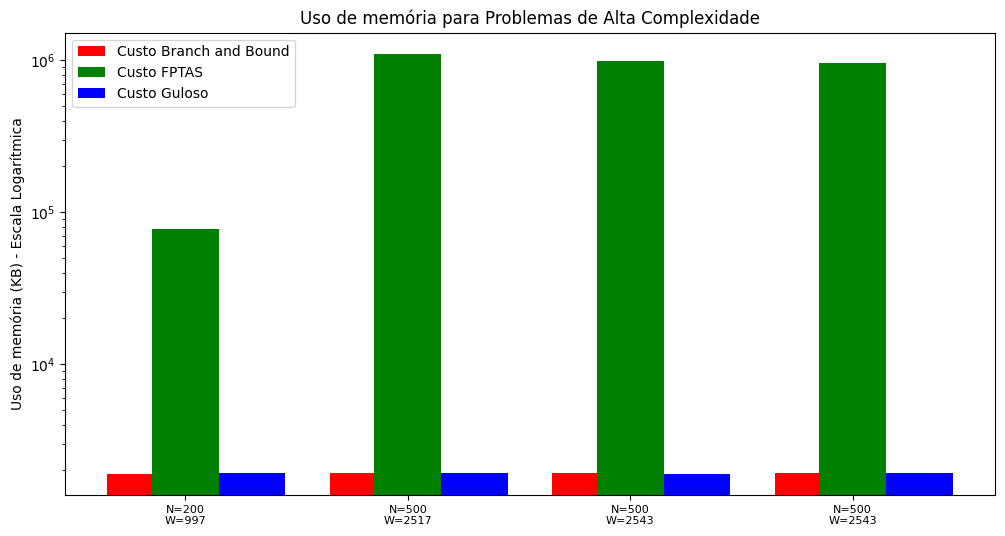

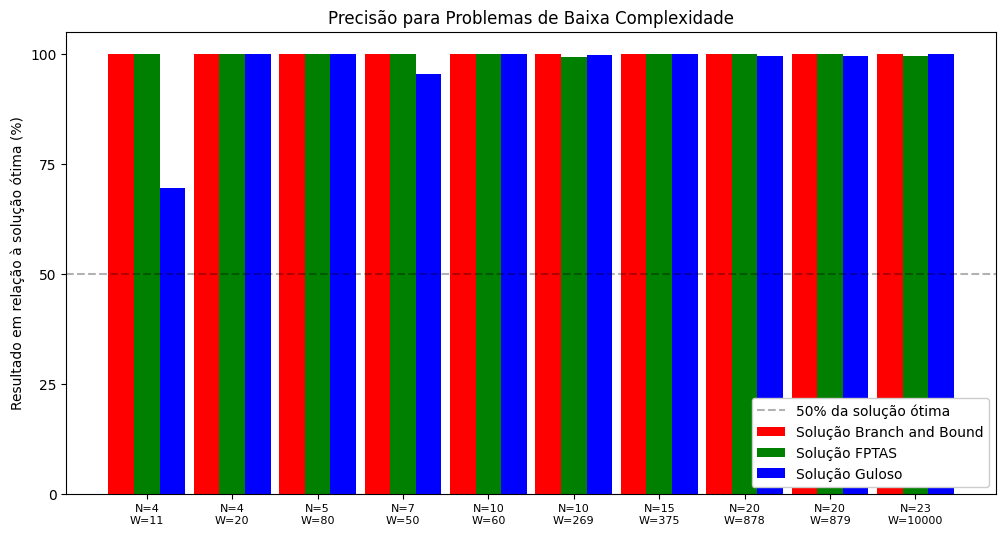

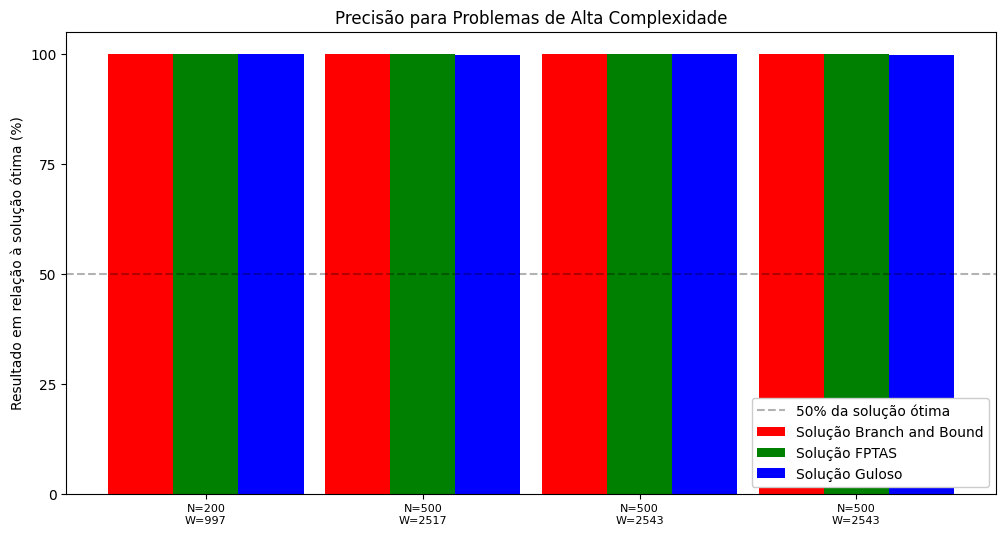

In [ ]:



df_low = df[df['type'] == 'Low'].sort_values(by=['N','W']).copy()
df_high = df[df['type'] == 'Large'].sort_values(by=['N','W']).copy()

#Tempo
plt.figure(figsize=(12, 6))
plt.title('Tempo de Execução para Problemas de Baixa Complexidade')
plt.yscale('log')
plt.bar(np.arange(len(df_low)) - 0.3, df_low['BB_time'], color='red', width=0.3, label='Tempo Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_low)), df_low['FPTAS_time'], color='green', width=0.3, label='Tempo FPTAS', alpha=1)
plt.bar(np.arange(len(df_low)) + 0.3, df_low['greedy_time'], color='blue', width=0.3, label='Tempo Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_low)),
    labels=[f"N={n_val}\nW={W_val}" for n_val, W_val in zip(df_low['N'], df_low['W'])],
    rotation=0,
    fontsize=8
)
plt.ylabel('Tempo (ms) - Escala Logarítmica')
plt.legend()
plt.savefig(bbox_inches='tight',fname="images/tempo_low.png")
plt.show()
plt.figure(figsize=(12, 6))
plt.title("Tempo de Execução para Problemas de Alta Complexidade")
plt.yscale('log')
plt.bar(np.arange(len(df_high)) - 0.3, df_high['BB_time'], color='red', width=0.3, label='Tempo Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_high)), df_high['FPTAS_time'], color='green', width=0.3, label='Tempo FPTAS', alpha=1)
plt.bar(np.arange(len(df_high)) + 0.3, df_high['greedy_time'], color='blue', width=0.3, label='Tempo Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_high)),
    labels=[f"N={n_val}\nW={W_val}" for n_val, W_val in zip(df_high['N'], df_high['W'])],
    rotation=0,
    fontsize=8
)
plt.ylabel('Tempo (ms) - Escala Logarítmica')
plt.legend()
plt.savefig(bbox_inches='tight',fname="images/tempo_high.png")
plt.show()

#Espaço
plt.figure(figsize=(12, 6))
plt.title('Uso de memória para Problemas de Baixa Complexidade')
plt.bar(np.arange(len(df_low)) - 0.3, df_low['BB_mem'], color='red', width=0.3, label='Custo Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_low)), df_low['FPTAS_mem'], color='green', width=0.3, label='Custo FPTAS', alpha=1)
plt.bar(np.arange(len(df_low)) + 0.3, df_low['greedy_mem'], color='blue', width=0.3, label='Custo Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_low)),
    labels=[f"N={n_val}\nW={W_val}" for n_val, W_val in zip(df_low['N'], df_low['W'])],
    rotation=0,
    fontsize=8
)
plt.ylabel('Uso de memória (KB)')
plt.legend()
plt.savefig(bbox_inches='tight',fname="images/custo_low.png")
plt.show()
plt.figure(figsize=(12, 6))
plt.title("Uso de memória para Problemas de Alta Complexidade")
plt.yscale('log')
plt.bar(np.arange(len(df_high)) - 0.2, df_high['BB_mem'], color='red', width=0.3, label='Custo Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_high)), df_high['FPTAS_mem'], color='green', width=0.3, label='Custo FPTAS', alpha=1)
plt.bar(np.arange(len(df_high)) + 0.3, df_high['greedy_mem'], color='blue', width=0.3, label='Custo Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_high)),
    labels=[f"N={n_val}\nW={W_val}" for n_val, W_val in zip(df_high['N'], df_high['W'])],
    rotation=0,
   fontsize=8
)
plt.ylabel('Uso de memória (KB) - Escala Logarítmica')
plt.legend()
plt.savefig(bbox_inches='tight',fname="images/custo_high.png")
plt.show()


#Precisão
plt.figure(figsize=(12, 6))
plt.title("Precisão para Problemas de Baixa Complexidade")
plt.bar(np.arange(len(df_low)) - 0.3, 100 * df_low['BB_sol']/df_low['BB_sol'], color='red', width=0.3, label='Solução Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_low)), 100 *df_low['FPTAS_sol']/df_low['BB_sol'], color='green', width=0.3, label='Solução FPTAS', alpha=1)
plt.bar(np.arange(len(df_low)) + 0.3, 100 *  df_low['greedy_sol']/df_low['BB_sol'], color='blue', width=0.3, label='Solução Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_low)),
    labels=[f"N={n_val}\nW={W_val}" for n_val, W_val in zip(df_low['N'], df_low['W'])],
    rotation=0,
   fontsize=8
)
plt.axhline(y=50, color='black', linestyle='--', label='50% da solução ótima',alpha=0.3)
plt.ylabel('Resultado em relação à solução ótima (%)')
plt.yticks([0,25,50,75,100])
plt.legend(loc='lower right',framealpha=1)
plt.savefig(bbox_inches='tight',fname="images/precisao_low.png")
plt.show()
plt.figure(figsize=(12, 6))
plt.title("Precisão para Problemas de Alta Complexidade")
plt.bar(np.arange(len(df_high)) - 0.3, 100 * df_high['BB_sol']/df_high['BB_sol'], color='red', width=0.3, label='Solução Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_high)), 100 * df_high['FPTAS_sol']/df_high['BB_sol'], color='green', width=0.3, label='Solução FPTAS', alpha=1)
plt.bar(np.arange(len(df_high)) + 0.3, 100 * df_high['greedy_sol']/df_high['BB_sol'], color='blue', width=0.3, label='Solução Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_high)),
    labels=[f"N={n_val}\nW={W_val}" for n_val, W_val in zip(df_high['N'], df_high['W'])],
    rotation=0,
    fontsize=8
    )
plt.axhline(y=50, color='black', linestyle='--', label='50% da solução ótima',alpha=0.3)
plt.ylabel('Resultado em relação à solução ótima (%)')
plt.yticks([0,25,50,75,100])
plt.legend(loc='lower right',framealpha=1)
plt.savefig(bbox_inches='tight',fname="images/precisao_high.png")
plt.show()


